# Load the necessary libraries


In [5]:
import requests #pip install requests
from bs4 import BeautifulSoup as bs #pip install beautiful soup 4

# Load our first page

In [4]:
# Load the webpage content

r=requests.get("https://keithgalli.github.io/web-scraping/example.html")

#Convert to a beautiful soup object
soup=bs(r.content) #So we are taking the content and converting it into beautifulSoup object

#Print out our html
print(soup)

<html>
<head>
<title>HTML Example</title>
</head>
<body>
<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>
<h2>A Header</h2>
<p><i>Some italicized text</i></p>
<h2>Another header</h2>
<p id="paragraph-id"><b>Some bold text</b></p>
</body>
</html>



In [5]:
print(soup.prettify()) #It shows all the indents 

<html>
 <head>
  <title>
   HTML Example
  </title>
 </head>
 <body>
  <div align="middle">
   <h1>
    HTML Webpage
   </h1>
   <p>
    Link to more interesting example:
    <a href="https://keithgalli.github.io/web-scraping/webpage.html">
     keithgalli.github.io/web-scraping/webpage.html
    </a>
   </p>
  </div>
  <h2>
   A Header
  </h2>
  <p>
   <i>
    Some italicized text
   </i>
  </p>
  <h2>
   Another header
  </h2>
  <p id="paragraph-id">
   <b>
    Some bold text
   </b>
  </p>
 </body>
</html>



# Start using Beautiful Soup to Scrape



## find and find_all

In [6]:
soup

<html>
<head>
<title>HTML Example</title>
</head>
<body>
<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>
<h2>A Header</h2>
<p><i>Some italicized text</i></p>
<h2>Another header</h2>
<p id="paragraph-id"><b>Some bold text</b></p>
</body>
</html>

In [7]:
#let's say that we just want to grab these h2 elements

h2_find=soup.find("h2")
h2_find

#It just gives us the first occurrence of it.

<h2>A Header</h2>

In [8]:
#What if we want all of the occurences occuring in the h2 tags.
h2_find_all=soup.find_all("h2")
h2_find_all

[<h2>A Header</h2>, <h2>Another header</h2>]

In [9]:
#Passing a list as the parameters

all_head_find=soup.find(["h1","h2"])
all_head_find

#So it will go and find the first element (the same ele present in the list irrespective of the order ) and return it

<h1>HTML Webpage</h1>

In [10]:
#If want all the tags in our list to be found

all_head=soup.find_all(["h1","h2"])
all_head

[<h1>HTML Webpage</h1>, <h2>A Header</h2>, <h2>Another header</h2>]

In [11]:
#We can pass attributes in our find functions

paragraph=soup.find_all("p",attrs={"id":"paragraph-id"}) #Attribute written in dictionary style.
paragraph


[<p id="paragraph-id"><b>Some bold text</b></p>]

In [12]:
#You can nest find and find all calls.
#let's say we want all the stuff inside the body.

body=soup.find('body')
body

<body>
<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>
<h2>A Header</h2>
<p><i>Some italicized text</i></p>
<h2>Another header</h2>
<p id="paragraph-id"><b>Some bold text</b></p>
</body>

In [13]:
#Now let's say that I want to find a dive inside the body.
div=body.find('div')
div
#We were able to nest find/find_all calls

headd=div.find('p')
headd

<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>

In [14]:
#We can reach specific strings in our find/findall calls

soup.find_all("p",string="Some") 
#Our answer is empty, if you look at the strings they consist of more words other than some.. so 
#We need to find some other way to extract the strings which contain the particular word that we need..
#Kind of how we use greple from re during filtering.


[]

In [15]:
import re

paragraphs=soup.find_all("p",string=re.compile("Some"))
paragraphs



[<p><i>Some italicized text</i></p>,
 <p id="paragraph-id"><b>Some bold text</b></p>]

In [16]:
headers=soup.find_all("h2",string=re.compile("header"))
headers

[<h2>Another header</h2>]

In [17]:
headers_case=soup.find_all("h2",string=re.compile("(H|h)eader"))
headers_case

[<h2>A Header</h2>, <h2>Another header</h2>]

In [18]:
soup.body #Short hand

<body>
<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>
<h2>A Header</h2>
<p><i>Some italicized text</i></p>
<h2>Another header</h2>
<p id="paragraph-id"><b>Some bold text</b></p>
</body>

## Select (CSS selector)

In [19]:
content=soup.select("p")
content #Selecting all the paragraph tag..

[<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>,
 <p><i>Some italicized text</i></p>,
 <p id="paragraph-id"><b>Some bold text</b></p>]

In [20]:
#We can also be very precise 

precise=soup.select("div p") #We want them to select paragraphs inside div
precise

[<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>]

In [21]:
#We want all the paragraphs preceded by header2


para=soup.select("h2 ~ p")
para

[<p><i>Some italicized text</i></p>,
 <p id="paragraph-id"><b>Some bold text</b></p>]

In [22]:
#We need the bold text tag inside the paragraph with the id, id="paragraph-id"

bold_text=soup.select("p#paragraph-id b")
bold_text

[<b>Some bold text</b>]

In [23]:
#Trying nested select

#We want the direct child (paragraph) of the body tag,#Direct descendents
parags=soup.select("body>p")
parags

[<p><i>Some italicized text</i></p>,
 <p id="paragraph-id"><b>Some bold text</b></p>]

In [24]:
for paragss in parags:
    print(paragss.select("i"))

[<i>Some italicized text</i>]
[]


In [25]:
#Grab by element with specific property
#Eg:- Alignment
soup.select("[align=middle]")

[<div align="middle">
 <h1>HTML Webpage</h1>
 <p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
 </div>]

## Get different properties of the HTML

In [26]:
#string within an element(so just text and not the full tag element)

headerr=soup.find("h2")
print(headerr) #So, we do get that tag.. how do we remove it?


print(headerr.string)

<h2>A Header</h2>
A Header


In [27]:
#Another example, but here there is a slight problem...
#We need all the text in the given div part.

div=soup.find("div")
print(div.prettify())
print(div.string) #We get None here.. But why?

#That is because there are two tags on ele as the same level as children so it is confused as to choose which one...
#HTML Webpage or Link to more interesting example:....

<div align="middle">
 <h1>
  HTML Webpage
 </h1>
 <p>
  Link to more interesting example:
  <a href="https://keithgalli.github.io/web-scraping/webpage.html">
   keithgalli.github.io/web-scraping/webpage.html
  </a>
 </p>
</div>

None


In [28]:
#For that we have a seperate method...
#get_text..

print(div.get_text()) #It returned to me all the text in div.


HTML Webpage
Link to more interesting example: keithgalli.github.io/web-scraping/webpage.html



### if multiple child elements then use get_text or use string. (Talking about the above code)

## How to get the links


In [29]:
#Get specific property from the links


link=soup.find("a")
print(link)

link['href'] #We are directly getting that link..

<a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a>


'https://keithgalli.github.io/web-scraping/webpage.html'

In [52]:
paragraphs=soup.select('p#paragraph-id')
print(paragraphs)

#id="paragraph-id" we only need this part...
#So we know that paragraphs has it's contents in a list


print(paragraphs[0]['id'])

[<p id="paragraph-id"><b>Some bold text</b></p>]
paragraph-id


## Code navigation

In [30]:
soup.body.div.h1.string #Using shortcuts

'HTML Webpage'

### Knowing the following terms

    1) Parents- body is the parent tag of the other stuff inside it
    2) Children:- div, p are the children of the parent tag 
    3) Sibling:- Children on the same level.

In [31]:
#There are many methods based on these terms alone..

#Finding the next siblings

test=soup.body.find("div")
print(test)
test.find_next_siblings()




<div align="middle">
<h1>HTML Webpage</h1>
<p>Link to more interesting example: <a href="https://keithgalli.github.io/web-scraping/webpage.html">keithgalli.github.io/web-scraping/webpage.html</a></p>
</div>


[<h2>A Header</h2>,
 <p><i>Some italicized text</i></p>,
 <h2>Another header</h2>,
 <p id="paragraph-id"><b>Some bold text</b></p>]

# Excercise!!

In [3]:
#Here is the source web page.

# https://keithgalli.github.io/web-scraping/webpage.html

###Load the web content

In [6]:
j=requests.get("https://keithgalli.github.io/web-scraping/webpage.html")

obj1=bs(j.content)
print(obj1.prettify())

<html>
 <head>
  <title>
   Keith Galli's Page
  </title>
  <style>
   table {
    border-collapse: collapse;
  }
  th {
    padding:5px;
  }
  td {
    border: 1px solid #ddd;
    padding: 5px;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  th {
    padding-top: 12px;
    padding-bottom: 12px;
    text-align: left;
    background-color: #add8e6;
    color: black;
  }
  .block {
  width: 100px;
  /*float: left;*/
    display: inline-block;
    zoom: 1;
  }
  .column {
  float: left;
  height: 200px;
  /*width: 33.33%;*/
  padding: 5px;
  }

  .row::after {
    content: "";
    clear: both;
    display: table;
  }
  </style>
 </head>
 <body>
  <h1>
   Welcome to my page!
  </h1>
  <img src="./images/selfie1.jpg" width="300px"/>
  <h2>
   About me
  </h2>
  <p>
   Hi, my name is Keith and I am a YouTuber who focuses on content related to programming, data science, and machine learning!
  </p>
  <p>
   Here is a link to my channel:
   <a href="https://www.youtube.com/kgmi

## Grab All the social links from the website (3 diff ways)

In [8]:
obj1.find_all("a") #But all this is not the proper answer we are getting a lot of stuff which are also not links..
#After inspecting the website, we find that they are all in a specific type of class
#in an unordered list called socials..


[<a href="https://www.youtube.com/kgmit">youtube.com/kgmit</a>,
 <a href="#footer"><sup>1</sup></a>,
 <a href="https://www.instagram.com/keithgalli/">https://www.instagram.com/keithgalli/</a>,
 <a href="https://twitter.com/keithgalli">https://twitter.com/keithgalli</a>,
 <a href="https://www.linkedin.com/in/keithgalli/">https://www.linkedin.com/in/keithgalli/</a>,
 <a href="https://www.tiktok.com/@keithgalli">https://www.tiktok.com/@keithgalli</a>,
 <a href="https://www.eliteprospects.com/team/10263/mit-mass.-inst.-of-tech./2014-2015?tab=stats"> MIT (Mass. Inst. of Tech.) </a>,
 <a href="https://www.eliteprospects.com/league/acha-ii/stats/2014-2015"> ACHA II </a>,
 <a href="https://www.eliteprospects.com/league/acha-ii/stats/2014-2015"> </a>,
 <a href="https://www.eliteprospects.com/team/10263/mit-mass.-inst.-of-tech./2015-2016?tab=stats"> MIT (Mass. Inst. of Tech.) </a>,
 <a href="https://www.eliteprospects.com/league/acha-ii/stats/2015-2016"> ACHA II </a>,
 <a href="https://www.elite

In [21]:
#THE FIRST METHOD
links=obj1.select("ul.socials a")
act_link=[link['href']for link in links]
print(act_link)

['https://www.instagram.com/keithgalli/', 'https://twitter.com/keithgalli', 'https://www.linkedin.com/in/keithgalli/', 'https://www.tiktok.com/@keithgalli']


In [28]:
#THE SECOND METHOD

temp=obj1.find("ul",attrs={"class":"socials"}) #We have to use the attrs- dictionary.
outlinks=temp.find_all("a")
# outlinks['href'] doing this is wrong as (list indices must be integers or slices, not str) we are getting this type of error.

#So like previous stuff that we did we must do a list comprehension.

act_links=[link['href']for link in outlinks]
print(act_links)

['https://www.instagram.com/keithgalli/', 'https://twitter.com/keithgalli', 'https://www.linkedin.com/in/keithgalli/', 'https://www.tiktok.com/@keithgalli']


In [29]:
#THE THIRD METHOD
#Looking into the links we see that they are stored in an li and have the class as social

obj1.select("li.social a")


[<a href="https://www.instagram.com/keithgalli/">https://www.instagram.com/keithgalli/</a>,
 <a href="https://twitter.com/keithgalli">https://twitter.com/keithgalli</a>,
 <a href="https://www.linkedin.com/in/keithgalli/">https://www.linkedin.com/in/keithgalli/</a>,
 <a href="https://www.tiktok.com/@keithgalli">https://www.tiktok.com/@keithgalli</a>]

## Scrape an HTML table into Pandas data frame.

In [37]:
#Will inspect the table at the website.
#My table has the class of hockey stats

table=obj1.select("table.hockey-stats")[0]
table #I don't want that list-ele thing, just show me the main thing with the tags, and as we know the table list will have only 1 element so this works.

#Now we need two things..
#Table column's name
#Table row's data


[<tr class="team-continent-NA">
 <td class="season sorted">
                   2014-15
               </td>
 <td class="team">
 <i><img src="images/flag.png"/></i>
 <span class="txt-blue">
 <a href="https://www.eliteprospects.com/team/10263/mit-mass.-inst.-of-tech./2014-2015?tab=stats"> MIT (Mass. Inst. of Tech.) </a>
 </span>
 </td>
 <td class="league"> <a href="https://www.eliteprospects.com/league/acha-ii/stats/2014-2015"> ACHA II </a> </td>
 <td class="regular gp">17</td>
 <td class="regular g">3</td>
 <td class="regular a">9</td>
 <td class="regular tp">12</td>
 <td class="regular pim">20</td>
 <td class="regular pm"></td>
 <td class="separator"> | </td>
 <td class="postseason">
 <a href="https://www.eliteprospects.com/league/acha-ii/stats/2014-2015"> </a>
 </td>
 <td class="postseason gp">
 </td>
 <td class="postseason g">
 </td>
 <td class="postseason a">
 </td>
 <td class="postseason tp">
 </td>
 <td class="postseason pim">
 </td>
 <td class="postseason pm">
 </td>
 </tr>,
 <tr

In [42]:

#For table column's name

colname=table.find("thead").find_all("th") #Here thead is actually the tag for table head...
colname

#SO, RIGHT NOW WE HAVE ALL OF OUR COLUMN NAMES BUT THEY HAVE ALL TAGS AROUND IT, LET'S GET THE STRING PART


coln=[c.string for c in colname]
coln #Now, we have all of our col names in a proper list.

['S',
 'Team',
 'League',
 'GP',
 'G',
 'A',
 'TP',
 'PIM',
 '+/-',
 '\xa0',
 'POST',
 'GP',
 'G',
 'A',
 'TP',
 'PIM',
 '+/-']

In [43]:
#Similarly for row name
rowdata=table.find("tbody").find_all("tr")
rowdata

[<tr class="team-continent-NA">
 <td class="season sorted">
                   2014-15
               </td>
 <td class="team">
 <i><img src="images/flag.png"/></i>
 <span class="txt-blue">
 <a href="https://www.eliteprospects.com/team/10263/mit-mass.-inst.-of-tech./2014-2015?tab=stats"> MIT (Mass. Inst. of Tech.) </a>
 </span>
 </td>
 <td class="league"> <a href="https://www.eliteprospects.com/league/acha-ii/stats/2014-2015"> ACHA II </a> </td>
 <td class="regular gp">17</td>
 <td class="regular g">3</td>
 <td class="regular a">9</td>
 <td class="regular tp">12</td>
 <td class="regular pim">20</td>
 <td class="regular pm"></td>
 <td class="separator"> | </td>
 <td class="postseason">
 <a href="https://www.eliteprospects.com/league/acha-ii/stats/2014-2015"> </a>
 </td>
 <td class="postseason gp">
 </td>
 <td class="postseason g">
 </td>
 <td class="postseason a">
 </td>
 <td class="postseason tp">
 </td>
 <td class="postseason pim">
 </td>
 <td class="postseason pm">
 </td>
 </tr>,
 <tr

In [50]:
#SO WE HAVE OUR TABLE COLUMN NAME AND ROW VALUES..

#Now we have to put the required stuff in the list and then put it in the data frame using pandas.

l=[]

for tr in rowdata:
    td=tr.find_all("td") #We are going through each element of rowdata to find the table data denoted by "td" tag.
    
    row=[str(tr.get_text()).strip() for tr in td] #so we are trying to get the text part so tr.string but we also don't want any white space, so we are doing str(tr.get_text()).strip for tr in td...
    l.append(row)
    
l#Yup we have something here

#Call the panda

import pandas as pd

df=pd.DataFrame(l,columns=coln)
df

,S,Team,League,GP,G,A,TP,PIM,+/-,,POST,GP,G,A,TP,PIM,+/-
0,2014-15,MIT (Mass. Inst. of Tech.),ACHA II,17,3,9,12,20,,|,,,,,,,
1,2015-16,MIT (Mass. Inst. of Tech.),ACHA II,9,1,1,2,2,,|,,,,,,,
2,2016-17,MIT (Mass. Inst. of Tech.),ACHA II,12,5,5,10,8,0,|,,,,,,,
3,2017-18,Did not play,,,,,,,,|,,,,,,,
4,2018-19,MIT (Mass. Inst. of Tech.),ACHA III,8,5,10,15,8,,|,,,,,,,


## Grab all the fun facts which contain "is" string in it

In [83]:
#I found all the fun facts were kept in a ul with the class of "fun-facts"
import re

ff=obj1.select("ul.fun-facts")[0]
print(ff)


# li=ff.find_all("li")
# li

# funf=[ele.get_text() for ele in li]
# funf

temp=ff.find_all(string=re.compile("is")) #When I was doing ff.find_all("li",string=re.compile("is")) I was only getting 2 sentence output instead of the actual one... 
# cause some li tags also had i tags in it too (italic) so I guess that was affecting it...
temp


# li.find_all()

<ul class="fun-facts">
<li>Owned my dream car in high school <a href="#footer"><sup>1</sup></a></li>
<li>Middle name is Ronald</li>
<li>Never had been on a plane until college</li>
<li>Dunkin Donuts coffee is better than Starbucks</li>
<li>A favorite book series of mine is <i>Ender's Game</i></li>
<li>Current video game of choice is <i>Rocket League</i></li>
<li>The band that I've seen the most times live is the <i>Zac Brown Band</i></li>
</ul>


['Middle name is Ronald',
 'Dunkin Donuts coffee is better than Starbucks',
 'A favorite book series of mine is ',
 'Current video game of choice is ',
 "The band that I've seen the most times live is the "]

In [81]:
#But the above list also has none values and we want to remove that, so another list comprehension

ans=[facts for facts in temp if facts] #Ele for ele in list if ele(meaning if true then only put ele in the list)
ans


['Middle name is Ronald',
 'Dunkin Donuts coffee is better than Starbucks',
 'A favorite book series of mine is ',
 'Current video game of choice is ',
 "The band that I've seen the most times live is the "]

In [85]:
#BUT THE SENTENCE IS NOT COMPLETE THAT IS BACAUSE SOME PARTS HAVE ITALIC TAGS IN IT AND HENCE GET STRIPED OF.. SO, WE NEED THE PARENT ELEMENT.
final=[facts.find_parent() for facts in temp if facts] #Ele for ele in list if ele(meaning if true then only put ele in the list)
final

[<li>Middle name is Ronald</li>,
 <li>Dunkin Donuts coffee is better than Starbucks</li>,
 <li>A favorite book series of mine is <i>Ender's Game</i></li>,
 <li>Current video game of choice is <i>Rocket League</i></li>,
 <li>The band that I've seen the most times live is the <i>Zac Brown Band</i></li>]

## Use beautiful soup to help download an image from a webpage

In [92]:
#So the photos are located in div class ="row"


gallery=obj1.select("div.row")[0]
print(gallery)


source=gallery.find_all("img")
source

<div class="row">
<div class="column">
<img alt="Lake Como" src="images/italy/lake_como.jpg" style="height:100%"/>
</div>
<div class="column">
<img alt="Pontevecchio, Florence" src="images/italy/pontevecchio.jpg" style="height:100%"/>
</div>
<div class="column">
<img alt="Riomaggiore, Cinque de Terre" src="images/italy/riomaggiore.jpg" style="height:100%"/>
</div>
</div>


[<img alt="Lake Como" src="images/italy/lake_como.jpg" style="height:100%"/>,
 <img alt="Pontevecchio, Florence" src="images/italy/pontevecchio.jpg" style="height:100%"/>,
 <img alt="Riomaggiore, Cinque de Terre" src="images/italy/riomaggiore.jpg" style="height:100%"/>]

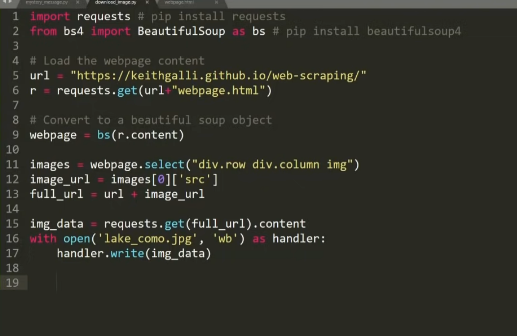

## Yep this is what they have done..  they went somewhere else, and their file got downloaded..

In [ ]:
#The main part was that we had to get the src, which turns out to be local path.. so we can just add it to the main url and then be able to download it..
#https://keithgalli.github.io/web-scraping/(+ that src path) + "webpage.html"

# Solve the mystery challenge

In [96]:
secret=obj1.select("div.block a")
secret

[<a href="challenge/file_1.html">File 1</a>,
 <a href="challenge/file_2.html">File 2</a>,
 <a href="challenge/file_3.html">File 3</a>,
 <a href="challenge/file_4.html">File 4</a>,
 <a href="challenge/file_5.html">File 5</a>,
 <a href="challenge/file_6.html">File 6</a>,
 <a href="challenge/file_7.html">File 7</a>,
 <a href="challenge/file_8.html">File 8</a>,
 <a href="challenge/file_9.html">File 9</a>,
 <a href="challenge/file_10.html">File 10</a>]

In [108]:
#We need to open those files now, and then in there there will be paragraph



a=[ele['href']for ele in secret]
print(a)


#Now we need to add this local url to our main one

url="https://keithgalli.github.io/web-scraping/"
for source in a:
    link=url+source
    
    page=requests.get(link) #We combine the main url with the local path and try to get that web page
    content=bs(page.content)#We are converting that content into something for beautiful soup...
    ans=content.find("p",attrs={"id":"secret-word"}) #Now we will select the specific attributes and tag
    
    reveal=ans.string#Get the string part..
    print(reveal)
    
    

['challenge/file_1.html', 'challenge/file_2.html', 'challenge/file_3.html', 'challenge/file_4.html', 'challenge/file_5.html', 'challenge/file_6.html', 'challenge/file_7.html', 'challenge/file_8.html', 'challenge/file_9.html', 'challenge/file_10.html']
Make
sure
to
smash
that
like
button
and
subscribe
!!!


## Done

In [ ]:
#https://art-nail-studio-nail-salon.business.site/?utm_source=gmb&utm_medium=referral

<!DOCTYPE html>
<html dir="ltr" itemscope="" itemtype="https://schema.org/LocalBusiness" lang="en-US"><head><base href="https://art-nail-studio-nail-salon.business.site/"/><meta content="origin" name="referrer"/><script data-id="_gd" nonce="hb4DHlYxmkpun5_gQ-nwRQ">window.WIZ_global_data = {"DpimGf":false,"E5zAXe":"https://workspace.google.com","EP1ykd":["/_/*","/posts/l/:listingId","/website/_/*","/website/demo","/website/demo/","/website/demo/*"],"FdrFJe":"6378962708678138721","Im6cmf":"/_/GeoMerchantPrestoSiteUi","LVIXXb":1,"LoQv7e":true,"MT7f9b":[],"MuJWjd":false,"NpZeBb":"%.@.3]","QrtxK":"","S06Grb":"","T44sLd":"","TmEjHd":0,"USwLPe":"https://business.google.com","W7VZyd":"","YYbdPc":"LEGACY_URL_PRESTO_NAME","Yllh3e":"%.@.1675778148926955,178652617,151370739]","aMvRme":"NO_CLICK_ID","cfb2h":"boq_geomerchantprestoserver_20230205.08_p0","eNnkwf":"","eptZe":"/_/GeoMerchantPrestoSiteUi/","fPDxwd":[1763433,1772879,45814370,47977019,48410021,48504704,48577232],"gGcLoe":false,"huG48":fals
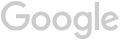

In [4]:
nail=requests.get("https://art-nail-studio-nail-salon.business.site/?utm_source=gmb&utm_medium=referral")
obj2=bs(nail.content)
print(obj2)